<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2022-01-01 to 2024-07-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          31 non-null     object 
 1   sales('0000)  31 non-null     float64
dtypes: float64(1), object(1)
memory usage: 744.0+ bytes


<Axes: xlabel='date'>

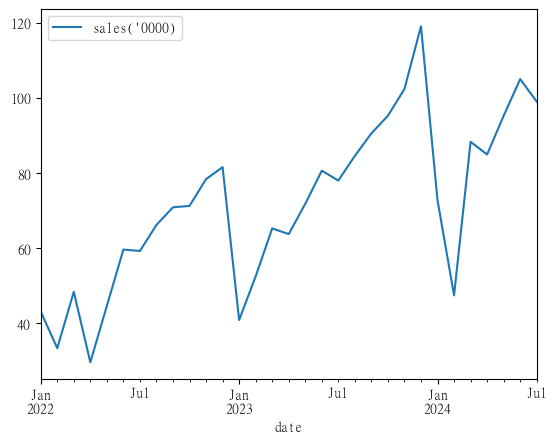

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import haversine
china_EV_sales = pd.read_csv('china_data_EV_monthly.csv')
china_EV_sales.head()
china_EV_sales.set_index('date')
china_EV_sales.index = pd.to_datetime(china_EV_sales['date'],format = '%Y-%m')
china_EV_sales.head()
china_EV_sales.info() 
china_EV_sales.plot()

In [78]:
taipei_sales= pd.read_csv('臺北市新車領牌數按使用燃料別分類.csv')
taipei_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7280 entries, 0 to 7279
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   資料年月    7280 non-null   int64 
 1   縣市      7280 non-null   object
 2   燃料別     7280 non-null   object
 3   車種類別    7280 non-null   object
 4   數量      7280 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 284.5+ KB


In [91]:
taipei_sales.head()
taipei_sales.index = pd.to_datetime(taipei_sales['資料年月'],format = '%Y%m')
taipei_sales.sample(20)
# delete the sum
taipei_sales_electric_small_car = taipei_sales[(taipei_sales['燃料別']=='電能') &(taipei_sales['車種類別']=='小客車')& (taipei_sales['資料年月']<202406)]
taipei_sales_electric_small_car.drop(columns = ['資料年月','縣市','燃料別','車種類別'], inplace = True)
taipei_sales_electric_small_car.head(5)


C:\Users\User\AppData\Local\Temp\ipykernel_20924\1142681841.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taipei_sales_electric_small_car.drop(columns = ['資料年月','縣市','燃料別','車種類別'], inplace = True)


,數量
資料年月,
2018-01-01,31
2018-02-01,26
2018-03-01,44
2018-04-01,9
2018-05-01,33


In [92]:
from statsmodels.tsa.arima.model import ARIMA
taipei_sales_electric_small_car.index = taipei_sales_electric_small_car.index.to_period('M')
model = ARIMA(taipei_sales_electric_small_car, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                     數量   No. Observations:                   77
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -503.242
Date:                Wed, 16 Oct 2024   AIC                           1018.483
Time:                        11:38:54   BIC                           1032.468
Sample:                    01-31-2018   HQIC                          1024.072
                         - 05-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9633      0.230     -4.187      0.000      -1.414      -0.512
ar.L2         -1.0003      0.262     -3.816      0.000      -1.514      -0.487
ar.L3         -0.6433      0.356     -1.809      0.0

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

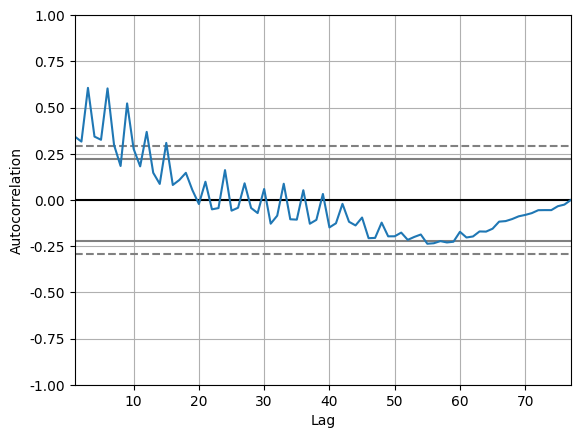

In [94]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(taipei_sales_electric_small_car)

c:\Users\User\Documents\GitHub\erbscope99\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36039 (\N{CJK UNIFIED IDEOGRAPH-8CC7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\Documents\GitHub\erbscope99\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26009 (\N{CJK UNIFIED IDEOGRAPH-6599}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\Documents\GitHub\erbscope99\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\Documents\GitHub\erbscope99\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\Documents\GitHub\erbscope99\.venv\lib\site-packages\IPytho

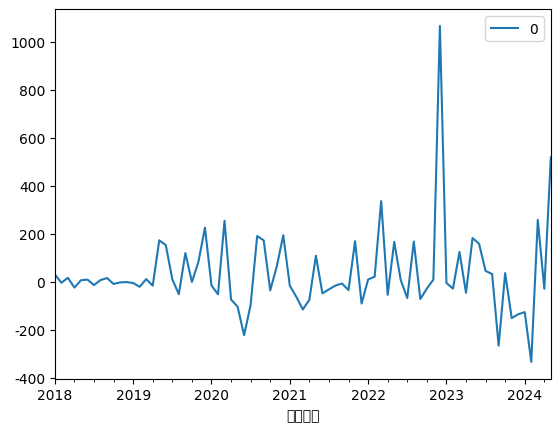

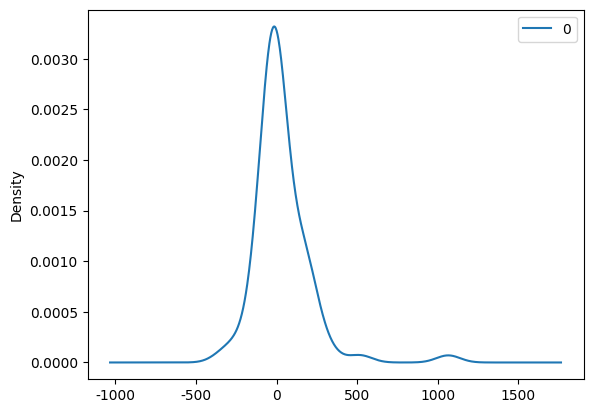

In [97]:

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

In [98]:
print(residuals.describe())

                 0
count    77.000000
mean     33.501451
std     175.821959
min    -333.549190
25%     -45.679955
50%      -2.349430
75%      83.414068
max    1065.981272


In [108]:
X = taipei_sales_electric_small_car.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [109]:
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

C:\Users\User\AppData\Local\Temp\ipykernel_20924\3163022022.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=157.849413, expected=541.000000
predicted=166.142462, expected=94.000000
predicted=224.054237, expected=439.000000
predicted=293.786203, expected=315.000000
predicted=153.797308, expected=102.000000
predicted=358.238253, expected=509.000000
predicted=395.157925, expected=334.000000
predicted=141.346780, expected=132.000000
predicted=433.830726, expected=412.000000
predicted=309.721988, expected=1392.000000
predicted=157.772270, expected=223.000000
predicted=225.557401, expected=338.000000
predicted=812.711202, expected=823.000000
predicted=458.145444, expected=314.000000
predicted=363.064797, expected=656.000000
predicted=913.543310, expected=1090.000000
predicted=315.612664, expected=399.000000
predicted=447.357215, expected=519.000000
predicted=885.036184, expected=572.000000
predicted=472.244701, expected=514.000000
predicted=647.804413, expected=482.000000
predicted=747.412378, expected=615.000000
predicted=487.832579, expected=354.000000
predicted=494.618955, expected=16

Test RMSE: 286.639


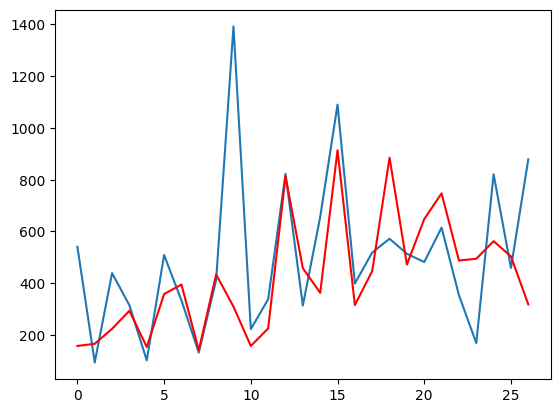

In [110]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

<Axes: xlabel='資料年月', ylabel='數量'>

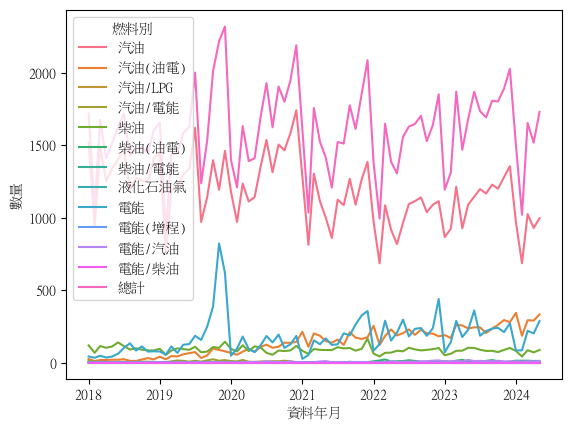

In [80]:
from matplotlib import font_manager
fontP = font_manager.FontProperties(family='Microsoft JhengHei', size=14)

taipei_sales_after_2023 = taipei_sales[taipei_sales['資料年月']<202406]
sns.lineplot(data = taipei_sales_after_2023, x=taipei_sales_after_2023.index ,y='數量', hue ='燃料別', errorbar = None)

<Axes: xlabel='資料年月', ylabel='數量'>

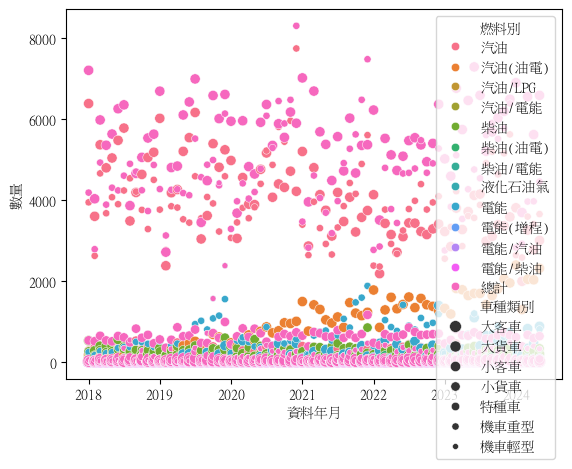

In [81]:
sns.scatterplot(data = taipei_sales_after_2023, x=taipei_sales_after_2023.index ,y='數量', hue = '燃料別', size = '車種類別')

In [82]:
import matplotlib
matplotlib.rcParams['font.family'] = 'MingLiu'

In [83]:
japan_sales=pd.read_excel('EV_share_of_japan_market.xlsx')
japan_sales.head(5)

,Date,BEV Number of units,BEV Share,PHEV Number of units,PHEV Share,BEV+PHEV Number of units,BEV+PHEV Share,All Number of units
0,2024-08-01,4425,0.0163,2647,0.0098,7072,0.0261,271468
1,2024-07-01,5072,0.0150,3683,0.0109,8755,0.0258,338704
2,2024-06-01,5010,0.0161,2650,0.0085,7660,0.0246,311904
3,2024-05-01,3795,0.0145,2505,0.0096,6300,0.0241,261327
4,2024-04-01,2866,0.0111,3040,0.0117,5906,0.0228,258762


In [84]:
japan_sales.index= pd.to_datetime(japan_sales['Date'], format= '%m/%y')
japan_sales.head(5)

,Date,BEV Number of units,BEV Share,PHEV Number of units,PHEV Share,BEV+PHEV Number of units,BEV+PHEV Share,All Number of units
Date,,,,,,,,
2024-08-01,2024-08-01,4425,0.0163,2647,0.0098,7072,0.0261,271468
2024-07-01,2024-07-01,5072,0.0150,3683,0.0109,8755,0.0258,338704
2024-06-01,2024-06-01,5010,0.0161,2650,0.0085,7660,0.0246,311904
2024-05-01,2024-05-01,3795,0.0145,2505,0.0096,6300,0.0241,261327
2024-04-01,2024-04-01,2866,0.0111,3040,0.0117,5906,0.0228,258762


In [85]:
japan_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56 entries, 2024-08-01 to 2020-01-01
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      56 non-null     datetime64[ns]
 1   BEV Number of units       56 non-null     int64         
 2   BEV Share                 56 non-null     float64       
 3   PHEV Number of units      56 non-null     int64         
 4   PHEV Share                56 non-null     float64       
 5   BEV+PHEV Number of units  56 non-null     int64         
 6   BEV+PHEV Share            56 non-null     float64       
 7   All Number of units       56 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 3.9 KB


<Axes: xlabel='Date', ylabel='BEV Number of units'>

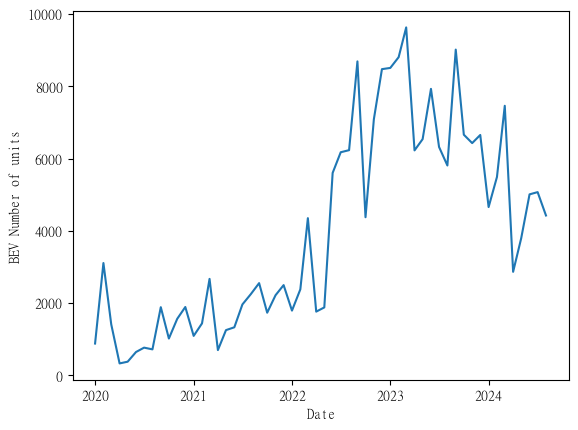

In [86]:
sns.lineplot(data = japan_sales, x = japan_sales.index, y = 'BEV Number of units')

In [87]:
taipei_total= pd.read_csv('臺北市機動車輛登記數按使用燃料別分類.csv')
taipei_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13104 entries, 0 to 13103
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   資料年月    13104 non-null  int64 
 1   縣市      13104 non-null  object
 2   燃料別     13104 non-null  object
 3   車種類別    13104 non-null  object
 4   數量      13104 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 512.0+ KB


In [88]:
taipei_total.head()

,資料年月,縣市,燃料別,車種類別,數量
0,201209,臺北市,汽油,大客車,39
1,201209,臺北市,汽油,大貨車,26
2,201209,臺北市,汽油,小客車,635193
3,201209,臺北市,汽油,小貨車,36222
4,201209,臺北市,汽油,特種車,4797


In [89]:
taipei_type = taipei_total.set_index('燃料別') 

In [90]:
taipei_total.index = pd.to_datetime(taipei_total['資料年月'],format = '%Y%m')

In [91]:
import matplotlib
matplotlib.matplotlib_fname()

'c:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

<Axes: xlabel='資料年月', ylabel='數量'>

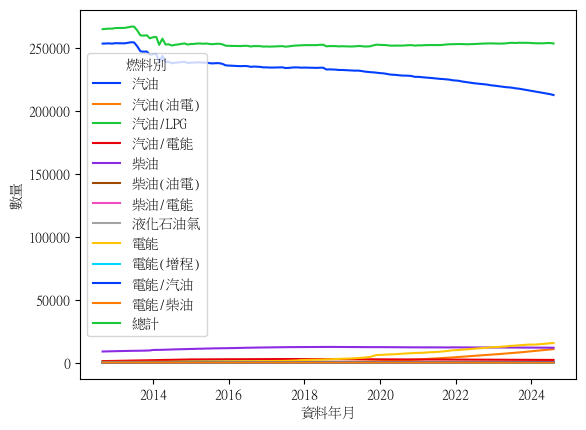

In [92]:
from matplotlib import font_manager
fontP = font_manager.FontProperties(family='Microsoft JhengHei', size=14)
fontP = font_manager.FontProperties()
fontP.set_family('SimHei')
fontP.set_size(14)
sns.lineplot(data = taipei_total, x =  taipei_total.index, y = '數量', hue = '燃料別', errorbar = None, palette="bright")

disel: 柴油 +電

electric : 純電

LPG: 石油氣

Petrol : 汽油 + 電

<Axes: xlabel='資料年月', ylabel='數量'>

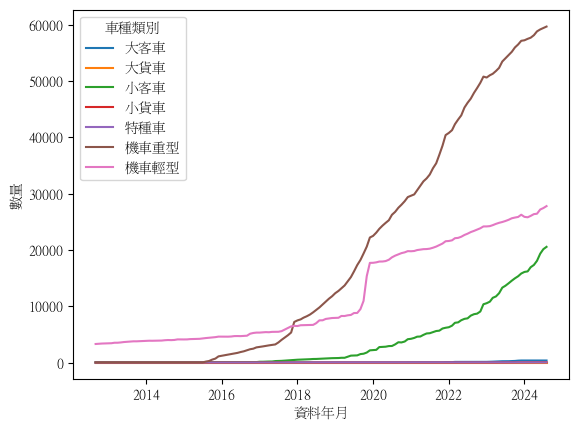

In [95]:
taipei_electric_only = taipei_total[(taipei_total.燃料別 == '電能')]
sns.lineplot(data = taipei_electric_only, x = taipei_electric_only.index, y = '數量', hue = '車種類別')

<Axes: xlabel='資料年月', ylabel='數量'>

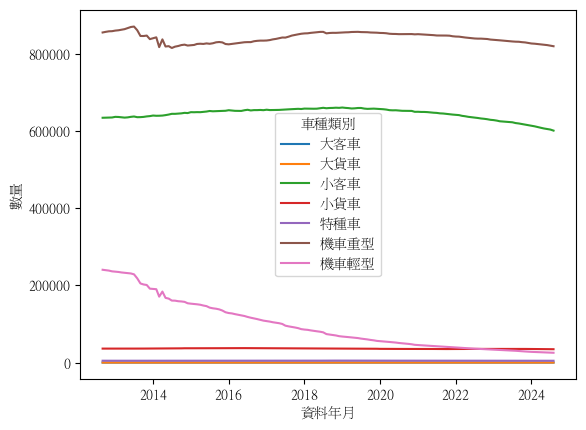

In [96]:
taipei_petrol = taipei_total[(taipei_total.燃料別 == '汽油')]
taipei_petrol.head(20)
sns.lineplot(data = taipei_petrol, x = taipei_petrol.index, y = '數量', hue = '車種類別')

In [27]:
from haversine import haversine, Unit
taipei_charger = pd.read_csv('1121218-臺北市營利電動車充電站.csv', encoding = 'Big5')
taipei_charger.head(20)
taipei_charger_tesla =taipei_charger[taipei_charger['廠商']=='Tesla']
taipei_charger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   序號      87 non-null     int64  
 1   廠商      87 non-null     object 
 2   名稱      87 non-null     object 
 3   地址      87 non-null     object 
 4   充電柱數量   87 non-null     int64  
 5   座標-經度   87 non-null     float64
 6   座標-緯度   87 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 4.9+ KB


In [28]:
taipei_charger_tesla.loc[1,'座標-經度']

np.float64(121.5755657)

In [30]:
from haversine import haversine, Unit
taipei_charger = pd.read_csv('1121218-臺北市營利電動車充電站.csv', encoding = 'Big5')
taipei_charger.head(20)
taipei_charger_tesla =taipei_charger[taipei_charger['廠商']=='Tesla']
taipei_charger.info()
points={}
distance =0
sum = 0
for i in range(len(taipei_charger_tesla.index)):
    points.update({i :(taipei_charger_tesla.loc[i,'座標-緯度'].item(),taipei_charger_tesla.loc[i,'座標-經度'].item())})
for i in range (1,len(taipei_charger_tesla.index)-1):
    for j in range (1,len(taipei_charger_tesla.index)-1):  
        print(haversine(points[i],points[j]))
        distance += haversine(points[i],points[j])
average_distance = distance/(len(taipei_charger_tesla.index))**2
print(f'average distance of tesla only = {average_distance}km')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   序號      87 non-null     int64  
 1   廠商      87 non-null     object 
 2   名稱      87 non-null     object 
 3   地址      87 non-null     object 
 4   充電柱數量   87 non-null     int64  
 5   座標-經度   87 non-null     float64
 6   座標-緯度   87 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 4.9+ KB
0.0
4.294354413520626
10.356187347614028
6.307892974923274
5.548008557192021
2.0023014290302923
3.437551821630501
6.632715515732425
7.7333428407755225
2.5163315052670274
6.323294596070126
4.294354413520626
0.0
14.361454716334901
8.759506535080016
9.768152498340863
4.03864502718421
5.187110920870392
10.530663874193014
11.322196023860187
6.651285799567016
8.769321223417771
10.356187347614028
14.361454716334901
0.0
12.597316861308617
5.018548895619679
11.878232685232092
12.505029024132735
3.8449533953

In [31]:
%%time
point={}
distance1 = 0
for i in range(len(taipei_charger.index)):
    point.update({i :(taipei_charger.loc[i,'座標-緯度'].item(),taipei_charger.loc[i,'座標-經度'].item())})
for i in range(1,len(taipei_charger.index)-1):
    for j in range (1,len(taipei_charger.index)-1):  
        print(haversine(point[i],point[j]))
        distance1 += haversine(point[i],point[j])
average_distance1 = distance1/(len(taipei_charger.index))**2
print(f'average distance = {average_distance1}km')


0.0
4.294354413520626
10.356187347614028
6.307892974923274
5.548008557192021
2.0023014290302923
3.437551821630501
6.632715515732425
7.7333428407755225
2.5163315052670274
6.323294596070126
6.302390756184875
5.463258622726264
4.10961790791258
3.2498759627473004
0.5915441225618808
7.67474760968178
1.9223000040355482
2.4703704802245965
7.087001179111162
0.44818594180791954
8.91462267138794
4.078508853788796
3.8290819848527695
0.798842762593202
1.4096253838338952
4.973444550603414
3.3430787934452355
2.0548364427638455
12.50189099247271
0.42622967003971013
5.250347979720249
0.5168533542263839
7.421177319132979
4.144516116064655
1.2231008737429985
8.35575480647183
4.290402541835671
3.880939369988651
6.278820823190078
3.8663507355081252
6.89461144874315
0.8651554012465599
2.430522201780899
0.7486404789968327
6.1667918062928875
0.46014890693875177
2.8634304560713084
6.3209075925651685
4.630880955873609
0.04061735215705361
4.461817940620971
2.5967886327558705
5.481102466309039
3.5889168612205635

In [32]:
hk_charger = pd.read_excel('EV_Charger.xlsx')
hk_charger.head(20)

,NAME_OF_DISTRICT_COUNCIL_DISTRICT_EN,LOCATION_EN,ADDRESS_EN,NAME_OF_DISTRICT_COUNCIL_DISTRICT_TC,LOCATION_TC,ADDRESS_TC,NAME_OF_DISTRICT_COUNCIL_DISTRICT_SC,LOCATION_SC,ADDRESS_SC,STANDARD_BS1363_no,...,MEDIUM_OTHERS_no,QUICK_CHAdeMO_no,QUICK_CCS_DC_COMBO_no,QUICK_IEC62196_no,QUICK_GB_T20234_3_DC__no,QUICK_OTHERS_no,REMARK_FOR__OTHERS_,DATA_PATH,GeometryLongitude,GeometryLatitude
0,Central & Western,CENTRESTAGE,"HOLLYWOOD ROAD, CENTRAL & WESTERN",中西區,聚賢居,中西區 荷李活道,中西区,聚贤居,中西区 荷李活道,0,...,6,0,0,0,0,4,Tesla Wall Connector,https://ev-charger.epd.gov.hk/resource/ev_char...,114.150894,22.283770
1,Central & Western,WING ON CENTRE,"CONNAUGHT ROAD CENTRAL, CENTRAL & WESTERN",中西區,永安中心,中西區 干諾道中,中西区,永安中心,中西区 干诺道中,0,...,2,0,0,0,0,0,Tesla Wall Connector,https://ev-charger.epd.gov.hk/resource/ev_char...,114.153015,22.286591
2,Central & Western,MAN YEE BUILDING,"DES VOEUX ROAD CENTRAL, CENTRAL & WESTERN",中西區,萬宜大廈,中西區 德輔道中,中西区,万宜大厦,中西区 德辅道中,0,...,0,0,0,2,0,0,-,-,114.156151,22.283655
3,Central & Western,KWAN YICK BUILDING PHASE 3,"DES VOEUX ROAD WEST, CENTRAL & WESTERN",中西區,均益大廈第三期,中西區 德輔道西,中西区,均益大厦第三期,中西区 德辅道西,0,...,2,0,0,0,0,1,Tesla Wall Connector,https://ev-charger.epd.gov.hk/resource/ev_char...,114.140053,22.288149
4,Central & Western,NEW WORLD TOWER,"QUEEN'S ROAD CENTRAL, CENTRAL & WESTERN",中西區,新世界大廈,中西區 皇后大道中,中西区,新世界大厦,中西区 皇后大道中,1,...,0,0,0,0,0,0,-,-,114.156937,22.280323
5,Central & Western,THE CENTER,"QUEEN'S ROAD CENTRAL, CENTRAL & WESTERN",中西區,中環中心,中西區 皇后大道中,中西区,中环中心,中西区 皇后大道中,0,...,0,0,0,0,0,0,-,-,114.154701,22.284603
6,Central & Western,ISLAND SHANGRI-LA HOTEL,"QUEENSWAY, CENTRAL & WESTERN",中西區,港島香格里拉大酒店,中西區 金鐘道,中西区,港岛香格里拉大酒店,中西区 金钟道,0,...,0,0,0,0,0,1,Tesla Wall Connector,https://ev-charger.epd.gov.hk/resource/ev_char...,114.164307,22.277136
7,Central & Western,CITIC TOWER,"TIM MEI AVENUE, CENTRAL & WESTERN",中西區,中信大廈,中西區 添美道,中西区,中信大厦,中西区 添美道,0,...,0,0,0,0,0,3,Tesla Wall Connector,https://ev-charger.epd.gov.hk/resource/ev_char...,114.167160,22.280632
8,Central & Western,TWO IFC (International Finance Centre) - IFC II,"FINANCE STREET, CENTRAL & WESTERN",中西區,國際金融中心二期,中西區 金融街,中西区,国际金融中心二期,中西区 金融街,0,...,0,0,0,7,0,0,-,https://ev-charger.epd.gov.hk/resource/ev_char...,114.157738,22.285873
9,Central & Western,Sun Yat Sen Memorial Park,16 Eastern Street,中西區,中山紀念公園,東邊街16號,中西区,中山纪念公园停车场(游泳池),西营盘东边街北16号,0,...,0,0,0,0,0,0,-,-,114.143805,22.289588


In [56]:
import math
from itertools import combinations
from haversine import haversine, Unit
x=[]
y=[]
def dist(p1, p2):
    (x1, y1), (x2, y2) = p1, p2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
distances = 0
for i in range(len(hk_charger.index)):
    x.append(hk_charger.loc[i,'GeometryLatitude'].item())
for i in range(len(hk_charger.index)):
    y.append(hk_charger.loc[i,'GeometryLongitude'].item())
    
points = list(zip(x,y))
distances = [haversine(p1, p2) for p1, p2 in combinations(points, 2)]
amount = 0 
for i in distances:
    amount += i
amount/len(distances)


12.885812066733697

In [59]:
x=[]
y=[]
def dist(p1, p2):
    (x1, y1), (x2, y2) = p1, p2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
distances = 0
for i in range(len(taipei_charger.index)):
    x.append(taipei_charger.loc[i,'座標-緯度'].item())
for i in range(len(taipei_charger.index)):
    y.append(taipei_charger.loc[i,'座標-經度'].item())
    
points = list(zip(x,y))
distances = [dist(p1, p2) for p1, p2 in combinations(points, 2)]
amount = 0 
for i in distances:
    amount += i
amount/len(distances)


0.04929901335312634

In [60]:
from haversine import haversine, Unit

distance =[haversine(p1, p2) for p1, p2 in combinations(points, 2)]
amount = 0 
for i in distance:
    amount += i
amount/len(distance)

5.1884289753008

In [67]:
# plotting with matplotlib

taipei_sales.head(2)

,資料年月,縣市,燃料別,車種類別,數量
資料年月,,,,,
2018-01-01,201801,臺北市,汽油,大客車,0
2018-01-01,201801,臺北市,汽油,大貨車,0


<Axes: xlabel='資料年月', ylabel='數量'>

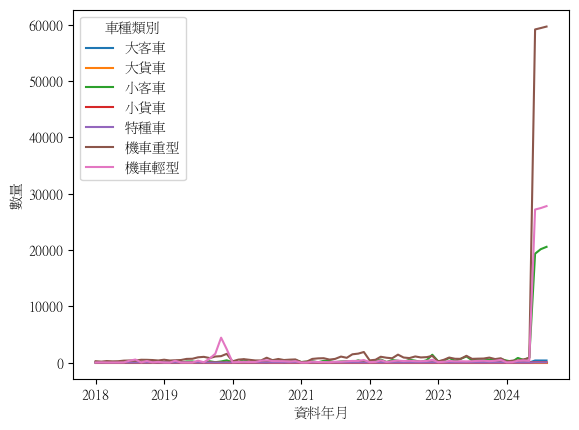

In [74]:
taipei_sales_electric = taipei_sales[taipei_sales['燃料別']=='電能']
sns.lineplot(data = taipei_sales_electric, x = taipei_sales_electric.index, y = '數量', hue = '車種類別')



<Axes: xlabel='資料年月', ylabel='數量'>

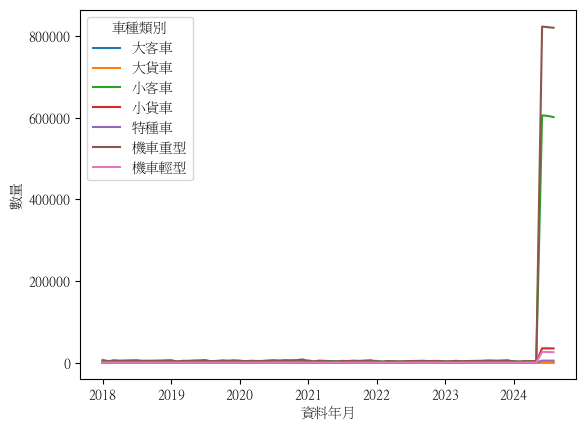

In [75]:
taipei_sales_petrol = taipei_sales[taipei_sales['燃料別']=='汽油']
sns.lineplot(data = taipei_sales_petrol, x = taipei_sales_petrol.index, y = '數量', hue = '車種類別')